In [5]:
from modules.base import *

#### 1. tool 사용하기
- LLM이 판단했을때, Tool을 사용해야 할 경우, AIMessage 에 툴 호출 정보가 추가됨.
    - content 비어있음.
    - additional_kwargs에 tool_calls 정보 추가됨.
    - `예시) AIMessage(content='', additional_kwargs={'tool_calls'..`
- tools_condition : 메시지가 tool call 인지 아닌지 판단하는 함수
    - tool call 인 경우, tool 노드로 이동
    - tool call 이 아닌 경우, END로 이동

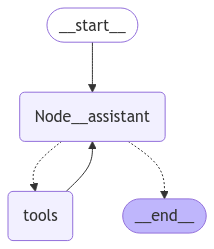

In [6]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [divide, add, multiply]
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

@trace_function(enable_print=True)
def Node__assistant(state:MessagesState):
   system_message = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")
   return_state = {"messages": [llm_with_tools.invoke([system_message] + state["messages"])]}
   return return_state

builder = StateGraph(MessagesState)
builder.add_node("Node__assistant", Node__assistant)
builder.add_node("tools", ToolNode(tools)) # execute tool when AI message is tool call
builder.add_edge(START, "Node__assistant")
builder.add_conditional_edges("Node__assistant", tools_condition)
builder.add_edge("tools", "Node__assistant")
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")]
messages = graph.invoke({"messages": messages})


🚀 Passing Through [Node__assistant] ..

#### [Input State]
  args: ({'messages': [HumanMessage(content='Add 3 and 4. Multiply the output by 2. Divide the output by 5', additional_kwargs={}, response_metadata={}, id='f38cd6c3-e052-4b28-b77c-630680a52845')]},)
  kwargs: {}

#### [Output State]
  result: {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LZahFPWY4qcniRoS36bJjbDJ', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 145, 'total_tokens': 163, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_5f20662549', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-53ff1d55-1c11-4b70-bf15-5acc31b160c4-0', tool_